# Logistic Regression
### Victor Nascimento Ribeiro 07/2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

### Ploting

In [2]:
def show_graph(X, y, w, line):
    # plot points
    plt.figure(figsize=(12,5))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.scatter(X[:,1], X[:,2], c=color)
    plt.tight_layout()
    #plot line
    if line == True:
        plt.title("w = (%.1f , %.1f, %.1f)" % (w[0], w[1],w[2]))
        xtar = np.arange(-10,10,0.1)
        plt.plot(xtar, (-w[0] - w[1]*xtar) / w[2]) # w0 + w1x + w2y = 0
    plt.show()
        
        
def show_error(cost, title):
    plt.figure(figsize=(12, 5))
    plt.plot(np.arange(iterations), cost)
    plt.title(title)
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.tight_layout()
    plt.show()
    
    
def show_3d(x1, x2, x3, w, plane):
    # plot points
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.scatter3D(x1, x2, x3, s=50, c=color, alpha=1)
    # plot plane
    if plane == True:
        x_values = np.linspace(-11, 11, N)
        y_values = np.linspace(-11, 11, N)
        X, Y = np.meshgrid(x_values, y_values) 
        Z = (-w[0] - w[1]*X - w[2]*Y) / w[3] # w0 + w1x + w2y + w3z = 0
        #Z = 3*np.sin(X) + 3*np.cos(Y)
        ax.plot_surface(X, Y, Z, color='g')
    plt.show()

## Criando um set de treinamento aleatorio não linearmente separável - 2D

- Nosso set de treinamento consiste em N pontos aleatórios $(x_1,x_2) \in [-10, 10] \times [-10, 10] \subseteq R^2$ 

- Seja fixa a função $f(x) = 4sin(x)\;$

- Vamos decidir a qual classe cada ponto pertence usando $f(x)$: </br > 
  - se $x_2 > f(x_1)$ o ponto está acima de $f$, logo pertence a classe <font color="blue">AZUL</font>
  - senão, o ponto está abaixo $f$, logo pertence a classe <font color="red">VERMELHA</font>

In [3]:
N = 100

# creating a random data
x1 = np.random.randint(-10,10,N)
x2 = np.random.randint(-10,10,N)

X = np.concatenate(([np.ones(N)],[x1],[x2]), axis=0)
X = np.transpose(X)

y = np.ones(N)


# assign colors
color = np.array(['b' if x2[i] > 4*np.sin(x1[i]) else 'r' for i in range(N)])
y[np.where(color == 'r')] = -1

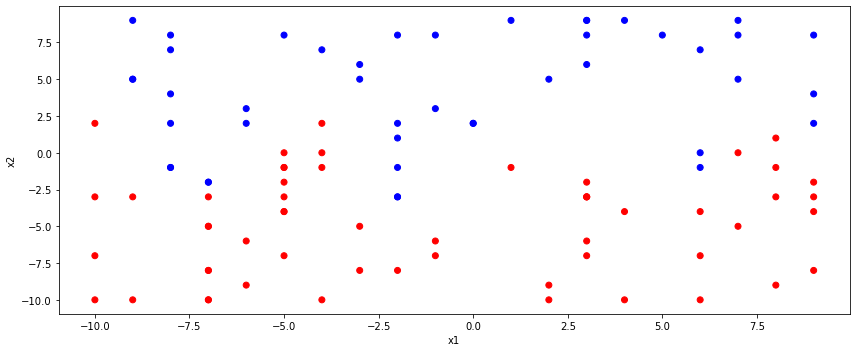

In [4]:
show_graph(X, y, 0, False)

## Hypotesis

Queremos $f$ tal que $0 \leq f(x) \leq 1$, então vamos considerar a hipótese do tipo:

$\normalsize h_w(x) = \theta(w^{T}X)$

onde $ \theta(z) = \dfrac{e^{z}}{e^{z}+1} = \dfrac{1}{1+e^{-z}}$, $ \quad 0 \leq \theta(z) \leq 1 \implies 0 \leq h_w(x) \leq 1$, 

<img style="float: left;" src="https://vitalflux.com/wp-content/uploads/2020/05/sigmoid-function-plot-1.png">

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
alpha = 0.001 # learning rate
iterations = 5000 # epochs
w_01 = w_11 = np.random.rand(3) # small random values

## Formulação com $y \in \{-1,1\}$


Assumindo que nosso target é: $\normalsize f(x) = P(y = +1|x)$

se $\; \normalsize h_w(x) \approx f(x) \;$, então

$ \normalsize \quad P_w(y |x) = \begin{cases}
        h_w(x) & \text{, if } \; y = +1\\
        1 - h_w(x) & \text{, if } \; y = -1
        \end{cases} $
        
é uma boa estimativa de $\normalsize P(y |x)$

<br /> 


note que: $\normalsize \; 1 - \theta(z) = 1 - \dfrac{e^{z}}{e^{z}+1} = \dfrac{e^{z} + 1 - e^{z}}{e^{z}+1} = \dfrac{1}{e^{z}+1} = \theta(-z)$ </br >

logo $\normalsize 1 − \theta(z) = \theta(−z)$

<br /> 
<br /> 


Então podemos escrever: $\normalsize P_w(y |x) = \theta(yw^{T}X)$

<br /> 

### Maximum likelihood estimation

Vamos encontrar um $w$ que maximize a função de máxima verossimilhança dos exemplos observados. 

Assumindo que os exemplos são $i.i.d.$ (independent and identically distributed), a função de verossimilhança pode ser escrita como:

$\large \prod_{i = 1}^{N} P_w(y_i |x_i) = \prod_{i = 1}^{N} \theta(y_iw^{T}x_i)$

<br /> 



### Optimization problem
encontrar $w$ that <ins>maximize</ins> 
$\large \; \prod_{i = 1}^{N} \theta(y_iw^{T}x_i)$

<br />
<br />


ou, equivalentemente <ins>minimize</ins>

$ \begin{split}
\normalsize E_{in}(w) & = \normalsize -\dfrac{1}{N} \ln{\Big(\prod_{i = 1}^{N} \theta(y_iw^{T}x_i)\Big)} \\ & = 
\normalsize -\dfrac{1}{N} \sum_{i = 1}^{N} \ln{\Big(\theta(y_iw^{T}x_i)\Big)} \\ & = 
\normalsize \dfrac{1}{N} \sum_{i = 1}^{N} \ln{\Big(\frac{1}{\theta(y_iw^{T}x_i)}\Big)} \\ & = 
\normalsize \dfrac{1}{N} \sum_{i = 1}^{N} \ln{\Big(1 + e^{-y_iw^{T}x_i}}\Big)
\end{split}$

<br /> 


### Gradient Descent
$\normalsize \nabla E_{in}(w) = \begin{bmatrix} \dfrac{\partial E_{in}}{\partial w_0} & \dfrac{\partial E_{in}}{\partial w_1} & ... & \dfrac{\partial E_{in}}{\partial w_d} \end{bmatrix} ^{T}$

$ \begin{split} 
\normalsize \dfrac{\partial E_{in}}{\partial w} & = 
\normalsize \dfrac{\partial}{\partial w} \dfrac{1}{N} \sum_{i = 1}^{N} \ln{\Big(1 + e^{-y_iw^{T}x_i}}\Big) \\ & = 
\normalsize \dfrac{1}{N} \sum_{i = 1}^{N} -y_ix_i\dfrac{e^{-y_iw^{T}x_i}}{(1 + e^{-y_iw^{T}x_i})} \\ & = 
\normalsize -\dfrac{1}{N} \sum_{i = 1}^{N} y_ix_i\dfrac{1}{(1 + e^{y_iw^{T}x_i})} 
\end{split} $

<br /> 


In [7]:
def maximum_likelihood(w, X, y): 
    y_hat = sigmoid(y * np.dot(X, w.T))

    error = np.log(1/y_hat)

    return np.sum(error) / N

In [8]:
def linear_regression11(X, y, w, alpha, iterations):
    cost = np.zeros(iterations)

    for it in range (iterations):
        y_hat = sigmoid(-y * np.dot(X, w.T))

        delta_w = -y*X.T * y_hat 

        w = w - alpha * np.sum(delta_w,axis=1) / N
        cost[it] = maximum_likelihood(w, X, y)

    return w, cost

In [9]:
w_11, cost_11 = linear_regression11(X, y, w_11, alpha, iterations)

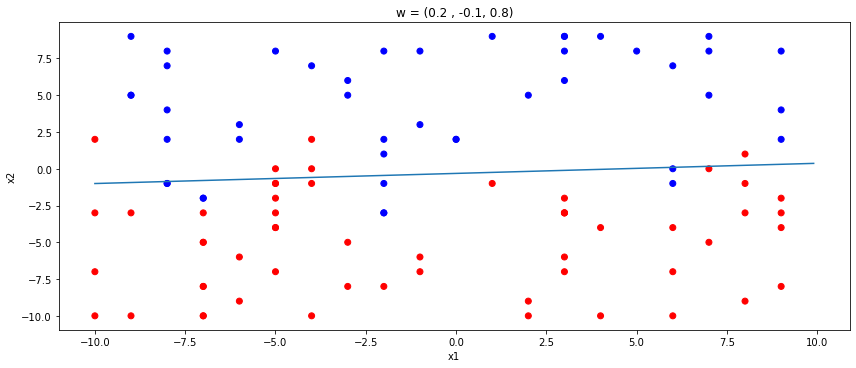

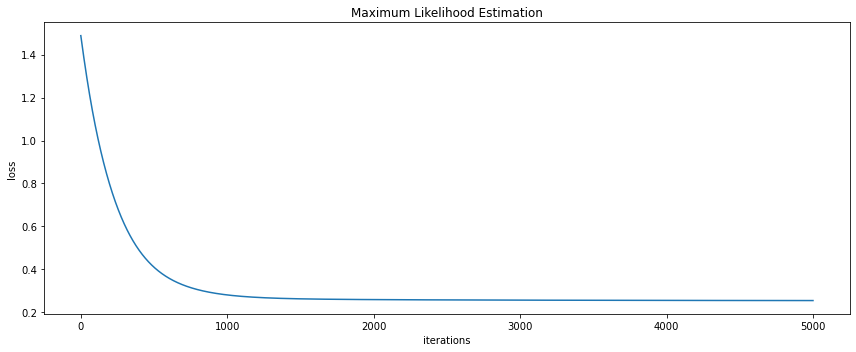

In [10]:
show_graph(X, y, w_11, line=True)
show_error(cost_11, "Maximum Likelihood Estimation")

In [11]:
# transform to y = {-1,1} interpretation
y[np.where(y==-1)] = 0



## Formulação com $y \in \{0,1\}$


Note que para $y \in \{0,1\}$, podemos escrever

$ \begin{split}  
\normalsize P_w(y |x) & =  
\normalsize P_w(y = 1|x)^{y} P_w(y = 0|x)^{1−y} \\ & =
\normalsize P_w(y = 1|x)^{y}\big[1 − P_w(y = 1|x)\big]^{1−y} 
\end{split} $

<br /> 


### Maximum likelihood estimation

Assim como na interpretação $\normalsize y \in \{-1,1\}$

Vamos encontrar um $w$ que maximize a função de máxima verossimilhança dos exemplos observados. 

Assumindo que os exemplos são $i.i.d.$ (independent and identically distributed), a função de verossimilhança pode ser escrita como:

$ \begin{split} 
\normalsize \prod_{i=0}^N P_w(y_i|x_i) & =  
\normalsize \prod_{i=0}^N P_w(y_i = 1|x_i)^{y}\big[1 − P_w(y_i = 1|x_i)\big]^{1−y_i} \\ & \approx
\normalsize \prod_{i=0}^N \big(\theta(w^{T}x_i)\big)^{y_i}\big(1-\theta(w^{T}x_i)\big)^{1-y_i}\\ & =
\normalsize \prod_{i=0}^N \hat{y}_i^{y_i} (1 - \hat{y}_i)^{1-y_i} 
\end{split} $

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; onde $\normalsize \hat{y}_i = \theta(w^{T}x_i)$ 

<br /> 

### Optimization problem

Seguido os mesmos passos vistos anteriormente, temos que a maximização da funcao acima é equivalente a minimzar:

$ \begin{split} 
E_{in}(w) & = 
\normalsize -\dfrac{1}{N} \ln{\prod_{i=0}^N \hat{y}_i^{y_i} (1 - \hat{y}_i)^{1-y_i}}  \\ & = 
\normalsize -\dfrac{1}{N} \sum_{i = 1}^{N} \ln{\Big(\hat{y}_i^{y_i} (1 - \hat{y}_i)^{1-y_i})\Big)} \\ & = 
\normalsize -\dfrac{1}{N} \sum_{i = 1}^{N} \ln{\hat{y}_i^{y_i}} + \ln{\big((1 - \hat{y}_i)^{1-y_i}\big)} \\ & = 
\normalsize -\dfrac{1}{N} \sum_{i = 1}^{N} y_i\ln{\hat{y}_i} + (1-y_i) \ln{(1 - \hat{y}_i)}
\end{split}$

&emsp;&emsp;&emsp;&emsp;&emsp;**Cross-Entropy Loss Function**

<br /> 


### Gradient Descent

Derivada da função Sigmoid $\theta(z)$

$ \begin{split} 
\normalsize \dfrac{\partial\hat{y}_i}{\partial w_j} =  \dfrac{\partial\theta(w^{T}x_i)}{\partial w_j} & =
\normalsize \dfrac{\partial}{\partial w_j} \Big(\dfrac{1}{1+e^{-w^{T}x_i}}\Big) \\ &  =
\normalsize \dfrac{e^{-w^{T}x_i}}{(1 + e^{-w^{T}x_i})^{2}} \cdot x_{ij}\\ & =
\normalsize \dfrac{1}{(1 + e^{-w^{T}x_i})} \cdot \dfrac{e^{-w^{T}x_i}}{(1 + e^{-w^{T}x_i})} \cdot x_{ij}\\ & =
\normalsize \dfrac{1}{(1 + e^{-w^{T}x_i})} \cdot \dfrac{(1 + e^{-w^{T}x_i}) - 1}{(1 + e^{-w^{T}x_i})} \cdot x_{ij}\\ & =
\normalsize \dfrac{1}{(1 + e^{-w^{T}x_i})} \cdot \biggl(\dfrac{1 + e^{-w^{T}x_i}}{(1 + e^{-w^{T}x_i})} - \dfrac{1} {1+e^{-w^{T}x_i}} \biggl) \cdot x_{ij}\\ & =
\normalsize \dfrac{1}{(1 + e^{-w^{T}x_i})} \cdot \biggl(1 - \dfrac{1} {1+e^{-w^{T}x_i}} \biggl) \cdot x_{ij}\\ \\& =
\normalsize \theta(w^{T}x_i) (1 - \theta(w^{T}x_i)) \cdot x_{ij} \\ \\ & = 
\normalsize \hat{y}_i (1 - \hat{y}_i) x_{ij}
\end{split} $

<br /> 
<br /> 


Derivada da **Cross-Entropy Loss Function**

$\large \nabla E_{in}(w) = \begin{bmatrix} \frac{\partial E_{in}}{\partial w_0} & \frac{\partial E_{in}}{\partial w_1} & ... & \frac{\partial E_{in}}{\partial w_d} \end{bmatrix} ^{T}$

$ \begin{split} 
\normalsize \dfrac{\partial E_{in}}{\partial w_j} & = 
\normalsize -\dfrac{1}{N} \sum_{i = 1}^{N} \dfrac{\partial}{\partial w_j} \Big(y_i\ln{\hat{y}_i} + (1-y_i) \ln{(1 - \hat{y}_i)} \Big)\\ & =
\normalsize -\dfrac{1}{N} \sum_{i = 1}^{N} y_i\dfrac{\hat{y}_i (1 - \hat{y}_i) x_{ij}}{\hat{y}_i} + (1-y_i) \dfrac{\big(-\hat{y}_i (1 - \hat{y}_i) x_{ij}\big)}{(1 - \hat{y}_i)} \\ & =
\normalsize -\dfrac{1}{N} \sum_{i = 1}^{N} y_i (1 - \hat{y}_i) x_{ij} + (1-y_i) (-\hat{y}_i) x_{ij} \\ & =
\normalsize -\dfrac{1}{N} \sum_{i = 1}^{N} \big(y_i - \hat{y}_i y_i -\hat{y}_i + \hat{y}_i y_i \big)x_{ij} \\ & =
\normalsize -\dfrac{1}{N} \sum_{i = 1}^{N} \big(y_i -\hat{y}_i \big)x_{ij}
\end{split}$

<br /> 


In [12]:
def binary_cross_entropy(w, X, y):    
    y_hat = np.dot(X,w.T)

    error = y * np.log(sigmoid(y_hat)) + (1-y) * np.log(1-sigmoid(y_hat))
    
    return  -np.sum(error)/N

In [13]:
def linear_regression01(X, y, w, alpha, iterations):
    cost= np.zeros(iterations)

    for it in range (iterations):
        y_hat = sigmoid(np.dot(X, w.T))

        delta_w = -np.dot((y - y_hat),X)

        w = w - alpha * delta_w / N
        cost[it] = binary_cross_entropy(w, X, y)

    return w, cost

In [14]:
w_01, cost_01 = linear_regression01(X, y, w_01, alpha, iterations)

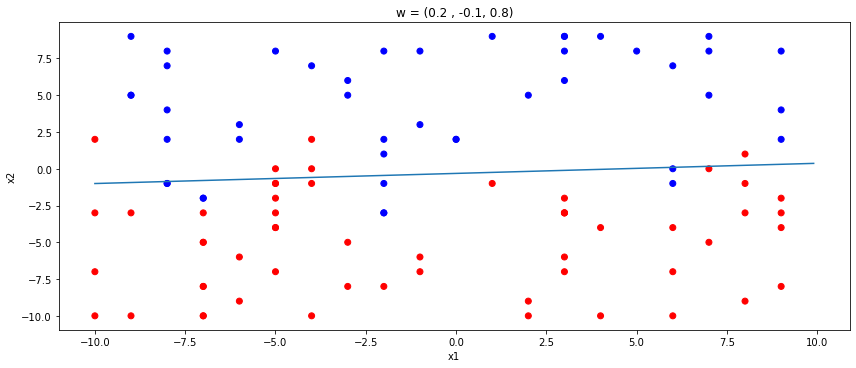

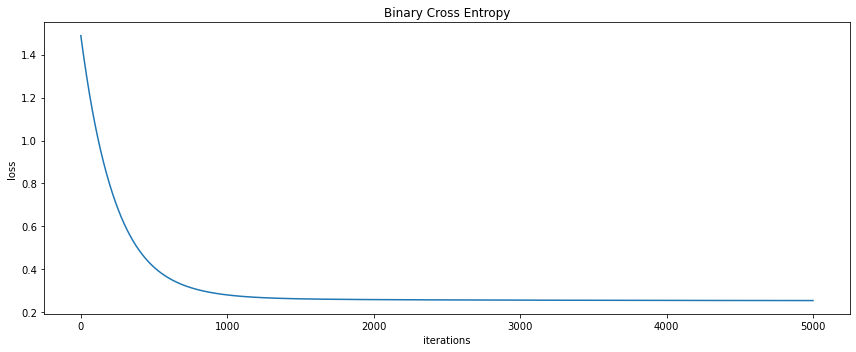

In [15]:
show_graph(X, y, w_01, line=True)
show_error(cost_01, "Binary Cross Entropy")

## Plot togheter

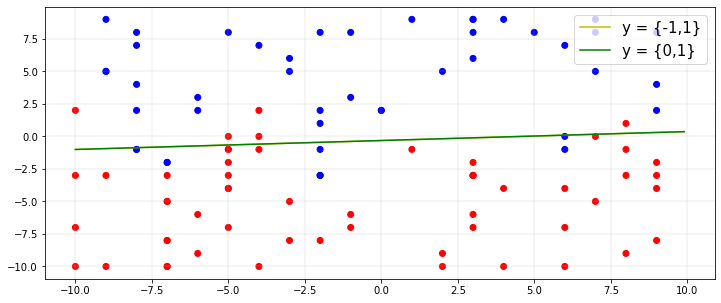

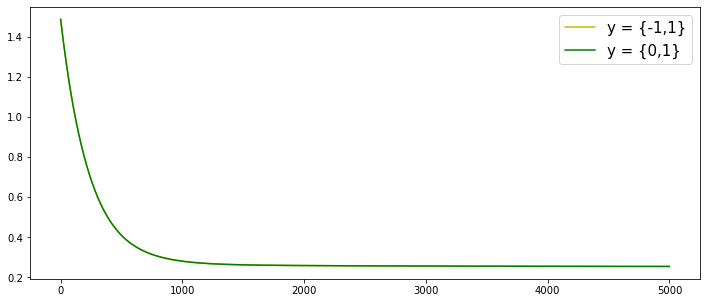

In [16]:
# points
plt.figure(figsize=(12, 5))
plt.scatter(X[:,1], X[:,2], c=color)
plt.grid(linewidth = 0.25)
xtar = np.arange(-10,10,0.1)
plt.plot(xtar, (-w_01[0] - w_01[1]*xtar)/w_01[2], c='y', label="y = {-1,1}")
plt.plot(xtar, (-w_11[0] - w_11[1]*xtar)/w_11[2], c='g', label="y = {0,1} ")
plt.legend(loc="upper right", fontsize=15) 
plt.show()
# lines
plt.figure(figsize=(12, 5))
plt.plot(np.arange(iterations), cost_11, c='y', label="y = {-1,1}")
plt.plot(np.arange(iterations), cost_01, c='g', label="y = {0,1} ")
plt.legend(loc="upper right", fontsize=15) 
plt.show()

## Creating a random non-linearly separable training set - 3D


- Nosso set de treinamento consiste em N pontos aleatórios $(x_1,x_2,x_3) \in [-10, 10] \times [-10, 10] \subseteq R^3$ 

- Sejam as funções $f(x_1,x_2) = 4sin(x_1) + 4cos(x_2)\;$ 

- Vamos decidir a qual classe cada ponto pertence usando $f(x_1,x_2)$: </br > 
  - if $x_3 > f(x_1,x_2)$ então o ponto está acima de $f$, então pertence a classe <font color="blue">AZUL</font>
  - senão, o ponto está abaixo $f$, então pertence a classe <font color="red">VERMELHO</font>
  

In [17]:
%matplotlib notebook

# creating a random data
x1 = np.random.randint(-10,10,N)
x2 = np.random.randint(-10,10,N)
x3 = np.random.randint(-10,10,N)

X = np.concatenate(([np.ones(N)], [x1], [x2], [x3]), axis=0)
X = np.transpose(X)
y = np.zeros(N)

# assign colors
color = np.array([])
for i in range (N):
    if x3[i] > 4*np.sin(x1[i]) + 4*np.cos(x2[i]):
        color = np.append(color,'b')
        y[i] = 1
    else:
        color = np.append(color,'r')

<IPython.core.display.Javascript object>


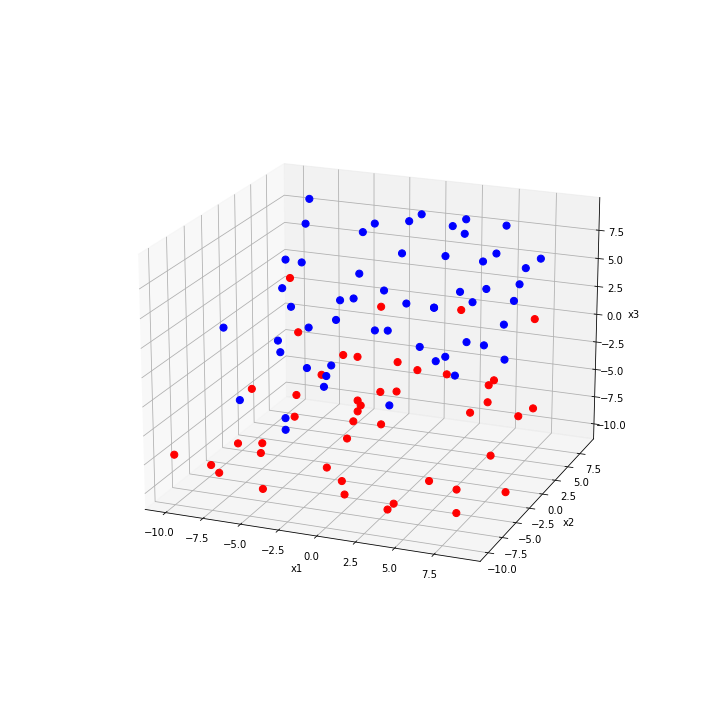

In [18]:
show_3d(x1, x2, x3, 0, plane=False)

### Using $\normalsize y \in\{0,1\}$ interpretation

In [19]:
w_3d = np.random.rand(4) # small random values

w_3d, cost_3d = linear_regression01(X, y, w_3d, alpha, iterations)

<IPython.core.display.Javascript object>


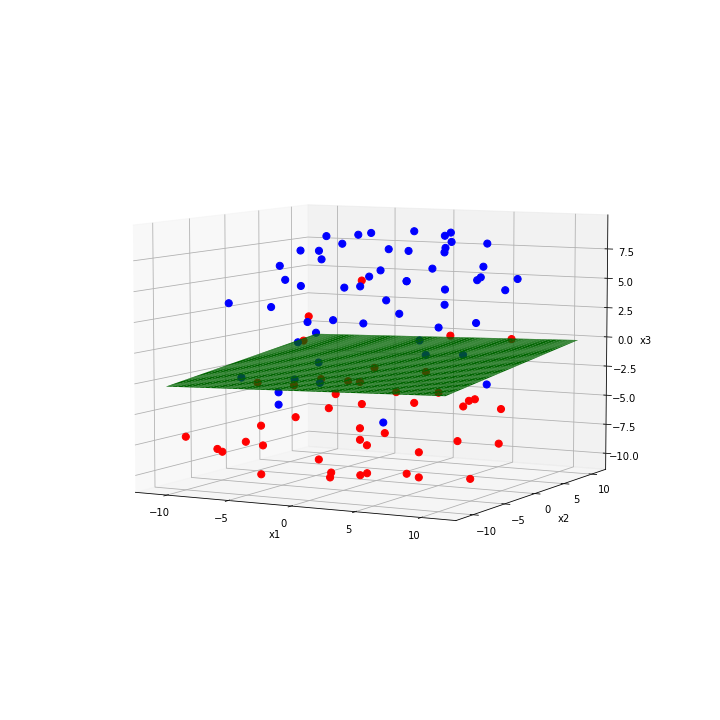

<IPython.core.display.Javascript object>


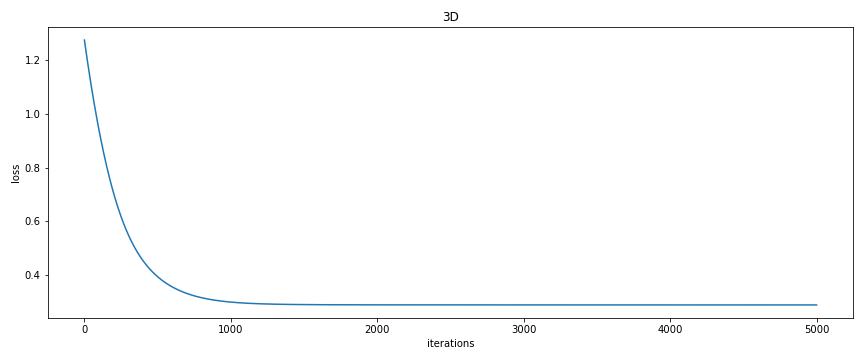

In [20]:
show_3d(x1, x2, x3, w_3d, plane=True)
show_error(cost_3d, "3D")

## References

 - Abu-Mostafa, Yaser S., Magdon-Ismail, Malik and Lin, Hsuan-Tien. Learning From Data. : AMLBook, 2012.
 - https://work.caltech.edu/telecourse (lecture 9)
 - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148